In [138]:
from PIL import Image
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as osp
import unicodedata
from panopticapi.utils import id2rgb, rgb2id
import cv2

In [104]:
IMAGE_ANN = '/home/lojze/data/datasets/LaRS/image_ann.json'
IMAGE_DIR = '/home/lojze/data/datasets/LaRS/images'
PANOPTIC_DIR = '/home/lojze/data/datasets/LaRS/panoptic_masks'
with open(IMAGE_ANN, 'r') as file:
    data = json.load(file)

In [26]:
df_data = []
for ann in data['annotations']:
    img_name = unicodedata.normalize('NFD', ann['file_name']).encode('ascii', 'ignore').decode('utf-8') # Normalize accent characters
    d = {
        'image': img_name,
        'scene_type': ann['labels']['scene_type'],
        'lighting': ann['labels']['lighting'],
        'reflections': ann['labels']['reflections'],
        'waves': ann['labels']['waves'],
        'sp_extra_dark': ann['labels']['special']['extra_dark'],
        'sp_extra_bright': ann['labels']['special']['extra_bright'],
        'sp_glitter': ann['labels']['special']['glitter'],
        'sp_dirty_lens': ann['labels']['special']['dirty_lens'],
        'sp_wakes': ann['labels']['special']['wakes'],
        'sp_rain': ann['labels']['special']['rain'],
        'sp_fog': ann['labels']['special']['fog'],
        'sp_plants_debris': ann['labels']['special']['plants_debris'],
    }
    df_data.append(d)

df = pd.DataFrame(df_data).set_index('image')
df

,scene_type,lighting,reflections,waves,sp_extra_dark,sp_extra_bright,sp_glitter,sp_dirty_lens,sp_wakes,sp_rain,sp_fog,sp_plants_debris
image,,,,,,,,,,,,
yt010_15_00050.jpg,river_like,day_like,moderate,still,False,False,False,False,False,False,False,False
yt010_16_00050.jpg,river_like,day_like,heavy,still,False,False,False,False,False,False,False,False
yt010_17_00080.jpg,river_like,day_like,heavy,still,False,False,False,False,False,False,False,False
yt010_17_00050.jpg,river_like,day_like,heavy,still,False,False,False,False,False,False,False,False
yt010_16_00080.jpg,river_like,day_like,heavy,still,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
inhouse_MatejK_valun_MVI_5122_00800.jpg,sea_like,day_like,none,moderate,False,False,False,False,False,False,False,False
orca_flow_12_00220.jpg,sea_like,day_like,moderate,moderate,False,False,False,False,False,False,False,False
inhouse_MatejK_valun_MVI_5218_00200.jpg,sea_like,day_like,none,moderate,False,False,False,False,False,False,False,False


In [38]:
def plot_images(images, image_dir=IMAGE_DIR, shape=(3,3), figsize=(15,10)):
    fig, axs = plt.subplots(shape[0], shape[1], figsize=figsize)

    it = iter(images)
    for ax_row in axs:
        for ax in ax_row:
            image = next(it)
            p = osp.join(image_dir, image)
            if not osp.exists(p):
                continue
            img = np.array(Image.open(p))
            ax.imshow(img)
            ax.set_xlabel(image)

In [55]:
np.unique(df[~df['waves'].isna()]['waves'])

array(['moderate', 'rough', 'still'], dtype=object)

['inhouse_MatejK_Izola_oktober2021_IMG_8656_00480.jpg', 'inhouse_MatejK_Izola_oktober2021_IMG_8658_00040.jpg', 'inhouse_MatejK_Izola_oktober2021_IMG_8660_00310.jpg', 'yt046_02_00180.jpg', 'yt073_07_00025.jpg', 'yt046_02_00080.jpg', 'inhouse_MatejK_Izola_oktober2021_IMG_8655_00050.jpg', 'inhouse_MatejK_Izola_oktober2021_IMG_8658_00150.jpg', 'yt046_05_00230.jpg']


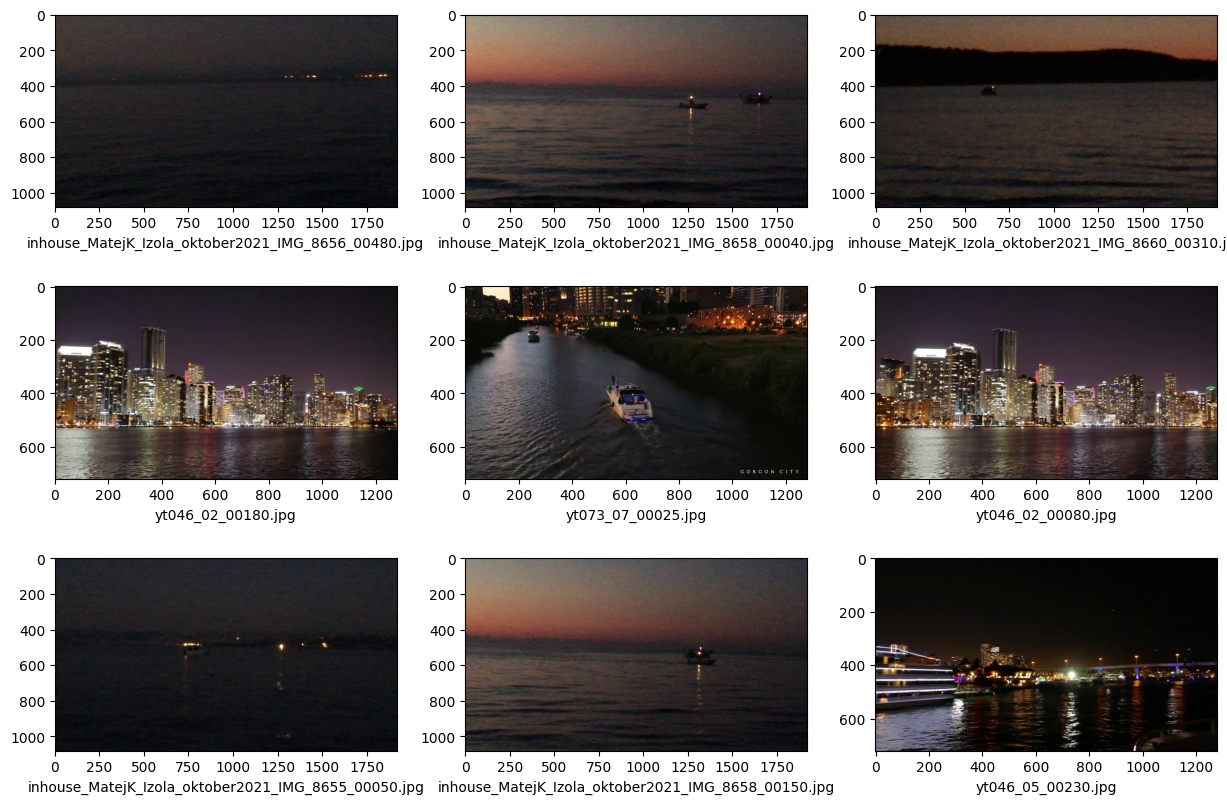

In [103]:
samples = df[df['lighting'] == 'night_like'].sample(9).index.to_list()
plot_images(samples)
print(samples)

In [120]:
img_name = 'inhouse_TomasV_V_20210909_163825_vHDR_On_00168'
img = np.array(Image.open(osp.join(IMAGE_DIR, f'{img_name}.jpg')))
mask_pan = np.array(Image.open(osp.join(PANOPTIC_DIR, f'{img_name}.png')))

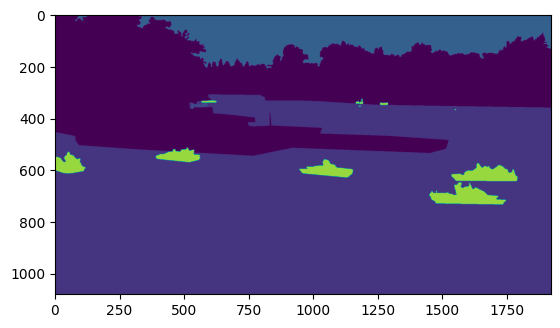

In [121]:
plt.imshow(mask_pan[...,0])

In [131]:
segmentation_colors = np.array([[0, 0, 0],
                                [247, 195, 37],
                                [41, 167, 224],
                                [90, 75, 164],
                                [237, 54, 33]], dtype=np.uint8) # Dynamic obstacles

In [132]:
np.unique(mask_pan[...,0])

array([ 1,  3,  4,  5, 12, 14], dtype=uint8)

In [135]:
cls_mask = np.zeros_like(mask_pan[...,0])
cls_mask[mask_pan[...,0] == 1] = 1
cls_mask[mask_pan[...,0] == 3] = 2
cls_mask[mask_pan[...,0] == 5] = 3
cls_mask[mask_pan[...,0] > 10] = 0
mask_rgb = segmentation_colors[cls_mask]
mask_draw = (cls_mask > 0)[..., None]

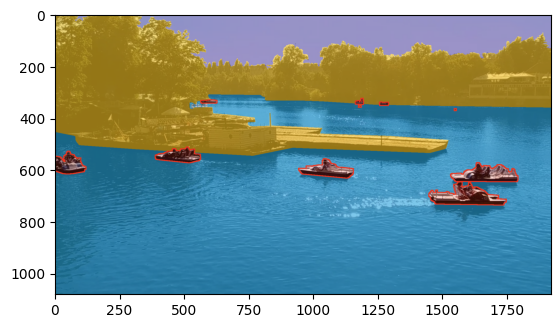

In [146]:
vis_img = ((mask_rgb * 0.6 + img * 0.4) * mask_draw + (1-mask_draw) * img).astype(np.uint8)

obst_m = (mask_pan[...,0] > 10).astype(np.uint8)
obst_b = (cv2.dilate(obst_m, np.ones((9,9))) - obst_m)[..., None]

c = segmentation_colors[np.full_like(cls_mask, fill_value=4)]
vis_img = (obst_m[..., None] * (0.2 * c + 0.8 * vis_img) + (1-obst_m[..., None]) * vis_img).astype(np.uint8) # add dynamic obstacles
vis_img = (obst_b * c + (1-obst_b) * vis_img).astype(np.uint8) # add boundary

plt.imshow(vis_img)

Image.fromarray(vis_img).save('figures/example.png')